## Overview

In today's competitive real estate market, homeowners seek ways to maximize the value of their properties through renovations. This project aims to leverage linear regression modeling to provide insights into how different types of home renovations can affect the estimated value of homes. By analyzing historical sales data and applying regression techniques, we will quantify the impact of specific renovation projects on home prices, helping homeowners make data-driven decisions and real estate agents provide expert advice to their clients.

## Business Understanding

The primary objective of this project is to provide actionable insights to a real estate agency that assists homeowners in buying and selling properties. The agency's clients often inquire about the potential increase in home value resulting from various renovation projects. Therefore, this project aims to address the following key objectives:

1. Develop a Predictive Model: Create and validate a linear regression model that predicts the increase in home value based on the type and extent of renovations undertaken, ensuring its reliability and applicability to various property types and market conditions.

2. Quantify the Impact of Renovations: Determine how different types of home renovations contribute to the overall increase in property value by analyzing historical sales data and identifying the renovations that provide the highest return on investment.

## Data Understanding

This project utilizes the King County House Sales dataset, contained in the file named kc_house_data.csv. This dataset includes various features related to house sales, such as square footage, number of bedrooms and bathrooms, presence of a waterfront, view quality, year built, and renovation status. The dataset also provides the sale price of each property, which serves as the dependent variable in our regression modeling. Detailed descriptions of the column names can be found in the accompanying column_names.md file. The aim is to leverage this rich dataset to understand and quantify the impact of various home renovations on property values.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('../data/kc_house_data.csv')

# Reading the column descriptions
with open('../data/column_names.md', 'r') as file:
    column_descriptions = file.read()

print(column_descriptions)

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

### Initial Comments on Column Names and Descriptions

Bade on the column descriptions, below are some further comments on some of them based on relevance for modelling or predicting house prices.
* Id and Date: These columns can be useful for identifying records and time-based analysis. However, they may not be directly useful for modeling.
* Price: This is the target variable we aim to predict.
* Bedrooms and Bathrooms: These are essential features representing the size and functionality of the house.
* Square Footage: The living area (sqft_living) and lot size (sqft_lot) are crucial features for predicting house prices.
* Floors, Waterfront, View, Condition, and Grade: These categorical features can significantly influence the house price and need to be encoded appropriately.
* Year Built and Year Renovated: These features can indicate the age and modernity of the house.
* Location (Latitude, Longitude, and ZIP code): Location features are often critical in real estate price prediction due to the influence of neighborhood and geographical factors.
* Square Footage of Neighbors: The living area and lot size of neighboring houses can provide context on the neighborhood’s characteristics.

In [2]:
# Display basic information about the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Dataset Information
* Number of Rows: 21,613
* Number of Columns: 21
* Column Names: Includes features like id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, and sqft_lot15.

### Descriptive Statistics
* Price: The average house price is approximately $540,000.
* Bedrooms: On average, houses have around 3.37 bedrooms.
* Bathrooms: The average number of bathrooms is 2.11.
* Square Footage (Living Area): The average living area is about 2,081 square feet.
* Square Footage (Lot): The average lot size is about 15,090 square feet.

### Initial Comments


The dataset looks quite clean. Below are some comments.
* Missing Values: Only 3 columns have some missing values, that is waterfrot, view and yr_renovated.
* Duplicates: Need to check for duplicate entries separately.
* Outliers: Given the wide range of values in columns like price, sqft_living, and sqft_lot, it is likely that there are outliers which we will need to address during the data cleaning process.

## EDA & Data Cleaning

In [3]:
# Inspect the Data
print(df.shape)
print(df.head())

(21597, 21)
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  

In [4]:
# Check for missing values
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [5]:
# Check if there are any duplicates in the entire DataFrame
any_duplicates = df.duplicated().any()
print(f"Any duplicates: {any_duplicates}")

Any duplicates: False


Comments:
* As earlier noted, only three columns have missing values, that is, waterfront(2,376), view(63) and yr_renovated(3,842).
* There are no dublicates.

In [6]:
# Address missing values
df = df.fillna(df.mean())

# Check for missing values
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Data Preparation

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Convert the correlation matrix to a readable format
correlation_table = correlation_matrix.round(2)
correlation_table

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.26,0.39,0.04,0.67,0.61,0.05,0.12,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.51,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.32,0.05,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.08,-0.01,0.11,0.18,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,0.49,0.00,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.26,-0.00,0.06,0.10,0.02,0.02,1.00,0.38,0.02,0.08,0.07,-0.02,0.07,0.03,-0.01,-0.04,0.08,0.03
view,0.01,0.39,0.08,0.19,0.28,0.08,0.03,0.38,1.00,0.05,0.25,0.17,-0.05,0.09,0.09,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00


### Feature Selection

Based on correlation analysis and domain knowledge, below features are recommended for modelling due to their potential impact on the target variable (price) and their practical relevance in real estate valuation.

**1. sqft_living (Square Footage of Living Area):**

* **Reason for Selection:** The sqft_living has the highest correlation with price at 0.7.

* **Expected Impact:** With a positive correlation of 0.70 with price, larger living areas are expected to lead to higher house prices.

**2. grade (Overall Grade Given to the Housing Unit):**

* **Reason for Selection:** Grade equally has a high correlation with Price at 0.67. The grade reflects the quality of construction and finishes in the house. Higher grades indicate better quality, which can be a significant selling point.

* **Expected Impact:** With a positive correlation of 0.67 with price higher grades would be expectd to result in higher property values.


**3. sqft_above (Square Footage of the House Apart from the Basement):**

* **Reason for Selection:** This feature represents the above-ground living area, which is often more valuable than basement space. It also has a moderately strong positive correlation of 0.61 with price.

* **Expected Impact:** With a positive correlation of 0.61 with price, more above-ground living space would generally be expected to increases the house's value.

**4. bathrooms (Number of Bathrooms):**

* **Reason for Selection:** The number of bathrooms is a crucial factor for buyers, as it impacts the functionality and convenience of the house. It also has a moderately strong positive correlation of 0.53 with price.

* **Expected Impact:** With the positive correlation of 0.53 with price, houses with more bathrooms would be expected to be valued higher.

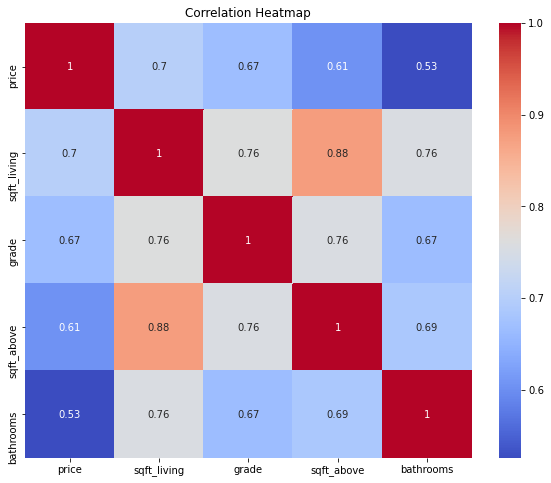

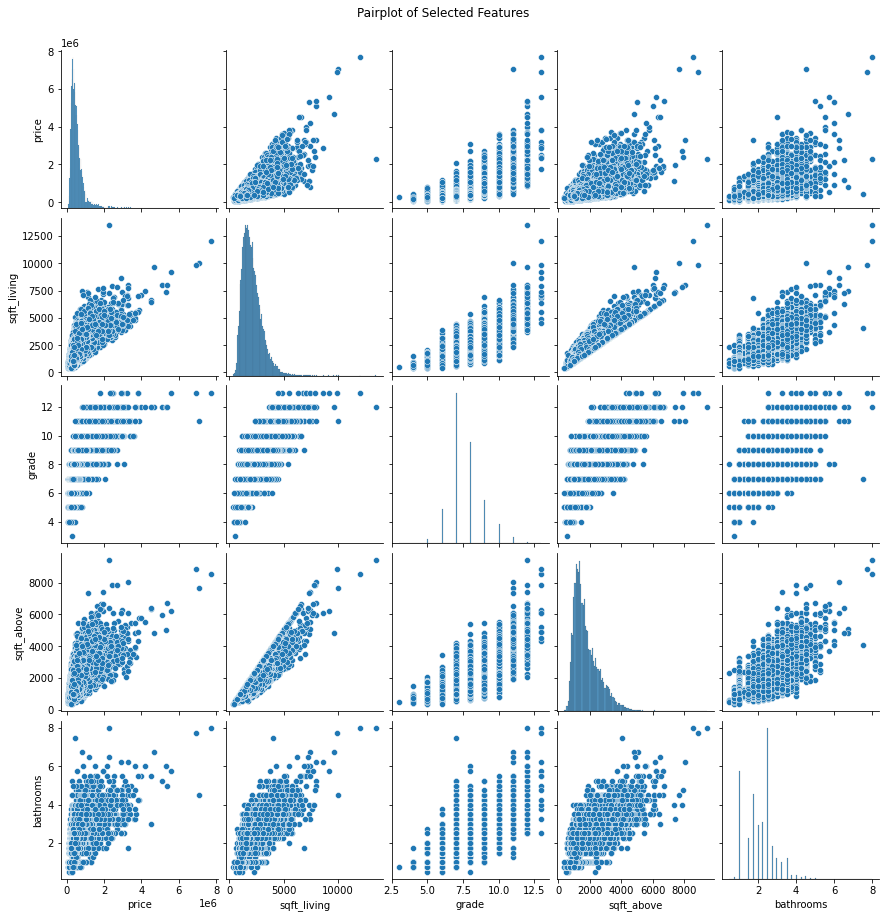

In [8]:
# Select a subset of features for pairplot to avoid clutter
sub_features = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[sub_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df[sub_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### Comments:

The correlation heatmap and pairplot for the selected features are shown above. These visualizations help us understand the relationships between the features and the target variable price. Here are some key observations that further support the potential of selected features in predicting house prices:

* Correlation Heatmap: sqft_living and grade have a strong positive correlation with price. This indicates that larger living spaces and higher grades are associated with higher house prices.
* Pairplot: The scatter plots in the pairplot show linear relationships between price and the selected features, particularly for sqft_living and grade.
* Multicollinearity: High correlation between sqft_living and sqft_above suggests multicollinearity, which needs to be addressed in modeling.
* Feature Selection: Based on the correlation values and pairplot visualizations, we can decide which features to include in our regression models.

#### Next Steps

* Further data cleaning: Based on the correlations and visualizations, we will prepare the data for modeling by selecting the most relevant features.
* Modeling: Build and compare several regression models to predict house prices.
* Validation: Evaluate the models using metrics like MAE, RMSE, and R-squared.

## Modeling

#### Iteration 1: Initial Models

Initial Models. With outliers, no Scaling and without addressing multicollinearity.

In [9]:
# Separate features and target
# Define X and y
X1 = df[sub_features].drop('price', axis=1)
y1 = df['price']

In [10]:
# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Model 1: Simple Linear Regression with one feature (sqft_living)
model1 = LinearRegression()
model1.fit(X1_train[['sqft_living']], y1_train)
y_pred1 = model1.predict(X1_test[['sqft_living']])

# Evaluate Model 1
mae1 = mean_absolute_error(y1_test, y_pred1)
mse1 = mean_squared_error(y1_test, y_pred1)
r2_1 = r2_score(y1_test, y_pred1)

# Model 2: Linear Regression with two features (sqft_living and grade)
model2 = LinearRegression()
model2.fit(X1_train[['sqft_living', 'grade']], y1_train)
y_pred2 = model2.predict(X1_test[['sqft_living', 'grade']])

# Evaluate Model 2
mae2 = mean_absolute_error(y1_test, y_pred2)
mse2 = mean_squared_error(y1_test, y_pred2)
r2_2 = r2_score(y1_test, y_pred2)

# Model 3: Linear Regression with three features (sqft_living, grade, and sqft_above)
model3 = LinearRegression()
model3.fit(X1_train[['sqft_living', 'grade', 'sqft_above']], y1_train)
y_pred3 = model3.predict(X1_test[['sqft_living', 'grade', 'sqft_above']])

# Evaluate Model 3
mae3 = mean_absolute_error(y1_test, y_pred3)
mse3 = mean_squared_error(y1_test, y_pred3)
r2_3 = r2_score(y1_test, y_pred3)

# Model 4: Linear Regression with four features (e.g., sqft_living, grade, sqft_above and bathrooms)
model4 = LinearRegression()
model4.fit(X1_train[['sqft_living', 'grade', 'sqft_above', 'bathrooms']], y1_train)
y_pred4 = model4.predict(X1_test[['sqft_living', 'grade', 'sqft_above', 'bathrooms']])

# Evaluate Model 4
mae4 = mean_absolute_error(y1_test, y_pred4)
mse4 = mean_squared_error(y1_test, y_pred4)
r2_4 = r2_score(y1_test, y_pred4)

print(f"Model 1 - MAE: {mae1}, MSE: {mse1}, R2: {r2_1}")
print(f"Model 2 - MAE: {mae2}, MSE: {mse2}, R2: {r2_2}")
print(f"Model 3 - MAE: {mae3}, MSE: {mse3}, R2: {r2_3}")
print(f"Model 4 - MAE: {mae4}, MSE: {mse4}, R2: {r2_4}")

Model 1 - MAE: 170982.92465955476, MSE: 65977373783.61759, R2: 0.49332469237979504
Model 2 - MAE: 162840.69782208806, MSE: 61550769137.98829, R2: 0.5273189413460091
Model 3 - MAE: 161005.30381084685, MSE: 61204919012.7009, R2: 0.5299749082111829
Model 4 - MAE: 159888.3637660468, MSE: 60729065072.41195, R2: 0.5336292434438783


#### Key Metrics for Evaluation

* Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower MAE is better.

* Mean Squared Error (MSE): Measures the average of the squares of the errors, giving more weight to larger errors. Lower MSE is better.

* R-Squared (R²): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R² is better, with a maximum value of 1.

#### Model Comments

* Model 1: This model has the highest errors (MAE, 170,982.92 & MSE, 65,977,373,783.62) and the lowest explanatory power (R2, 0.4933), indicating that using only sqft_living is not sufficient for predicting house prices accurately.

* Model 2: Adding grade as a second feature improves the model's performance by reducing errors (MAE, 162,840.70 & MSE, 61,550,769,137.99) and increasing the explanatory power (R2, 0.5273).

* Model 3: Including sqft_above as a third feature further improves the model's performance, resulting in the lowest errors (MAE, 161,005.30 & MSE, 61,204,919,012.70) and a higher explanatory power (R2, 0.5300).

* Model 4: Including bathrooms as a fourth feature continues to improve the model's performance, achieving the lowest errors (MAE,159,888.36 & MSE, 60,729,065,072.41) and highest explanatory power (R2, 0.5336).

### Iteration 2: Address Outliers

With outliers capped.

In [11]:
# Display the uncapped features
df[sub_features].describe()

,price,sqft_living,grade,sqft_above,bathrooms
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,7.657915,1788.596842,2.115826
std,3.673681e+05,918.106125,1.173200,827.759761,0.768984
min,7.800000e+04,370.000000,3.000000,370.000000,0.500000
25%,3.220000e+05,1430.000000,7.000000,1190.000000,1.750000
50%,4.500000e+05,1910.000000,7.000000,1560.000000,2.250000
75%,6.450000e+05,2550.000000,8.000000,2210.000000,2.500000
max,7.700000e+06,13540.000000,13.000000,9410.000000,8.000000


In [12]:
# Function to cap outliers using IQR method
def cap_outliers(data, columns):
    for feature in columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
        data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])
    return data

# Cap outliers in the selected features
df_capped = cap_outliers(df, sub_features)

# Display the capped features
df_capped[sub_features].describe()

,price,sqft_living,grade,sqft_above,bathrooms
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.117047e+05,2058.392184,7.599134,1769.804788,2.099244
std,2.499734e+05,838.660736,1.000943,763.788290,0.721473
min,7.800000e+04,370.000000,5.500000,370.000000,0.625000
25%,3.220000e+05,1430.000000,7.000000,1190.000000,1.750000
50%,4.500000e+05,1910.000000,7.000000,1560.000000,2.250000
75%,6.450000e+05,2550.000000,8.000000,2210.000000,2.500000
max,1.129500e+06,4230.000000,9.500000,3740.000000,3.625000


### Comments:

Reduction in Maximum Values:

The maximum values for sqft_living, sqft_above, grade, bathrooms, and price have significantly reduced. This is expected as the capping process limits the influence of extreme outliers.
Mean and Standard Deviation:

sqft_living and sqft_above: The mean and standard deviation have decreased, indicating that the data distribution is now more centered and less spread out after capping.

grade and bathrooms: The mean values have slightly decreased, and the standard deviations are lower, reflecting reduced variability due to capping.

price: The mean has decreased and the standard deviation has significantly reduced, indicating a more consistent data set with less extreme variability.

IQR and Quartiles:

The Interquartile Range (IQR) and the quartiles (Q1, Q2, Q3) have not changed much, as capping mainly affects the extreme values.

In [13]:
# Separate features and target
# Define X and y
X2 = df_capped[sub_features].drop('price', axis=1)
y2 = df_capped['price']

In [14]:
# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Model 1: Simple Linear Regression with one feature (e.g., sqft_living)
model1 = LinearRegression()
model1.fit(X2_train[['sqft_living']], y2_train)
y_pred1 = model1.predict(X2_test[['sqft_living']])

# Evaluate Model 1
mae1 = mean_absolute_error(y2_test, y_pred1)
mse1 = mean_squared_error(y2_test, y_pred1)
r2_1 = r2_score(y2_test, y_pred1)

# Model 2: Linear Regression with two features (e.g., sqft_living and grade)
model2 = LinearRegression()
model2.fit(X2_train[['sqft_living', 'grade']], y2_train)
y_pred2 = model2.predict(X2_test[['sqft_living', 'grade']])

# Evaluate Model 2
mae2 = mean_absolute_error(y2_test, y_pred2)
mse2 = mean_squared_error(y2_test, y_pred2)
r2_2 = r2_score(y2_test, y_pred2)

# Model 3: Linear Regression with three features (e.g., sqft_living, grade, and sqft_above)
model3 = LinearRegression()
model3.fit(X2_train[['sqft_living', 'grade', 'sqft_above']], y2_train)
y_pred3 = model3.predict(X2_test[['sqft_living', 'grade', 'sqft_above']])

# Evaluate Model 3
mae3 = mean_absolute_error(y2_test, y_pred3)
mse3 = mean_squared_error(y2_test, y_pred3)
r2_3 = r2_score(y2_test, y_pred3)

# Model 4: Linear Regression with four features (e.g., sqft_living, grade, sqft_above and bathrooms)
model4 = LinearRegression()
model4.fit(X2_train[['sqft_living', 'grade', 'sqft_above', 'bathrooms']], y2_train)
y_pred4 = model4.predict(X2_test[['sqft_living', 'grade', 'sqft_above', 'bathrooms']])

# Evaluate Model 4
mae4 = mean_absolute_error(y2_test, y_pred4)
mse4 = mean_squared_error(y2_test, y_pred4)
r2_4 = r2_score(y2_test, y_pred4)


print(f"Model 1 - MAE: {mae1}, MSE: {mse1}, R2: {r2_1}")
print(f"Model 2 - MAE: {mae2}, MSE: {mse2}, R2: {r2_2}")
print(f"Model 3 - MAE: {mae3}, MSE: {mse3}, R2: {r2_3}")
print(f"Model 4 - MAE: {mae4}, MSE: {mse4}, R2: {r2_4}")

Model 1 - MAE: 140758.1831601869, MSE: 31532711726.328255, R2: 0.49103496929645996
Model 2 - MAE: 131120.88073440106, MSE: 27770344490.892174, R2: 0.5517628055866342
Model 3 - MAE: 129803.11149984438, MSE: 27432949834.652058, R2: 0.5572086449125644
Model 4 - MAE: 129160.6885549101, MSE: 27242617861.51876, R2: 0.560280766314314


### Comments on Model Result Changes

Capping outliers has led to a significant improvement in all models, particularly in reducing MAE and MSE, and slightly improving R² for the best model.

* Model 1: There is improvement in MAE (140,758.18) and MSE (31,532,711,726.33), but a slight decrease in R2 (0.4910). This suggests that while the model's average error decreased, its overall fit to the data did not improve as much.

* Model 2: There is a noticeable improvement in all metrics, MAE(131,120.88), MSE(27,770,344,490.89) and R2(0.5518) indicating a better fit and reduced errors.

* Model 3: Continued improvement in all metrics, MAE(129,803.11), MSE(27,432,949,834.65) and R2(0.5572) indicating better prediction accuracy and explanatory power.

* Model 4: Significant improvement in all metrics, MAE(129,160.69), MSE(27,242,617,861.52) and R2(0.5603).  It provides the most accurate predictions with the lowest errors and highest explanatory power.

### Iteration 3: Address Multicollinearity 

Further modeling on model 4 (with capped outliers) which has the best statistics so far. sqft_abv dropped to address the high multicollinearity between sqft_living and sqft-above.

In [15]:
### Dropping sqft_abv
df2 = df_capped[sub_features].drop('sqft_above', axis=1)
df2.head()

,price,sqft_living,grade,bathrooms
0,221900.0,1180.0,7.0,1.00
1,538000.0,2570.0,7.0,2.25
2,180000.0,770.0,6.0,1.00
3,604000.0,1960.0,7.0,3.00
4,510000.0,1680.0,8.0,2.00


In [16]:
# Separate features and target
# Define X and y
X3 = df2.drop('price', axis=1)
y3 = df2['price']

# Split the data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [17]:
# Model 4: Linear Regression with four features (e.g., sqft_living, grade, sqft_above and bathrooms)
model4 = LinearRegression()
model4.fit(X3_train, y3_train)
y_pred4 = model4.predict(X3_test)

# Evaluate Model 4
mae4 = mean_absolute_error(y3_test, y_pred4)
mse4 = mean_squared_error(y3_test, y_pred4)
r2_4 = r2_score(y3_test, y_pred4)

print(f"Model 4 - MAE: {mae4}, MSE: {mse4}, R2: {r2_4}")

Model 4 - MAE: 130430.56277187045, MSE: 27575351995.251114, R2: 0.5549101518216251


Dropping the sqft_above feature resulted in a slight increase in both MAE and MSE and a slight decrease in R². This suggests that the model's predictive performance has slightly worsened after dropping the feature.

### Iteration 4: Address Scaling

Model 4 with capped Outliers and scaling. Took the model with the best metrics and scaled it to see if there are any further improvements.

In [18]:
df3 = df_capped[sub_features]
df3.head()

,price,sqft_living,grade,sqft_above,bathrooms
0,221900.0,1180.0,7.0,1180.0,1.00
1,538000.0,2570.0,7.0,2170.0,2.25
2,180000.0,770.0,6.0,770.0,1.00
3,604000.0,1960.0,7.0,1050.0,3.00
4,510000.0,1680.0,8.0,1680.0,2.00


In [19]:
# Separate features and target
# Define X and y
X5 = df3.drop('price', axis=1)
y5 = df3['price']

# Split the data into train and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [20]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X5_train)

# Transform the training data
X5_train_scaled = scaler.transform(X5_train)

# Transform the test data
X5_test_scaled = scaler.transform(X5_test)

In [21]:
# Model 4: Linear Regression with four features (sqft_living, grade, sqft_above and bathrooms)
model4 = LinearRegression()
model4.fit(X5_train_scaled, y5_train)
y_pred4 = model4.predict(X5_test_scaled)

# Evaluate Model 4
mae4 = mean_absolute_error(y5_test, y_pred4)
mse4 = mean_squared_error(y5_test, y_pred4)
r2_4 = r2_score(y5_test, y_pred4)

print(f"Model 4 - MAE: {mae4}, MSE: {mse4}, R2: {r2_4}")


Model 4 - MAE: 129160.68855490991, MSE: 27242617861.51887, R2: 0.5602807663143121


### Comments:

Scaling the predictors did not improve the model's performance. The metrics (MAE, MSE, and R²) are exactly the same before and after scaling.

This could be because Linear regression models are not affected by the absolute scales of the input features because the optimization of the model parameters inherently adjusts for these scales. Therefore, the performance metrics remain unchanged.

NB: Scaling is often important for algorithms that are sensitive to the scale of the input data (e.g., gradient descent-based methods). However, for linear regression, scaling does not affect the predictions because the model coefficients are adjusted to account for the scale of the predictors.

### Model Diagnosis

In [22]:
df4 = df_capped[sub_features]
df4.head()

,price,sqft_living,grade,sqft_above,bathrooms
0,221900.0,1180.0,7.0,1180.0,1.00
1,538000.0,2570.0,7.0,2170.0,2.25
2,180000.0,770.0,6.0,770.0,1.00
3,604000.0,1960.0,7.0,1050.0,3.00
4,510000.0,1680.0,8.0,1680.0,2.00


#### Linearity: Residuals vs. Fitted Values Plot

In [23]:
# Separate features and target
# Define X and y
X6 = df4.drop('price', axis=1)
y6 = df4['price']

# Split the data into train and test sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Model 4: Linear Regression with four features (sqft_living, grade, sqft_above and bathrooms) and Capped data
model4 = LinearRegression()
model4.fit(X6_train, y6_train)
y_pred4 = model4.predict(X6_test)

# Evaluate Model 4
mae4 = mean_absolute_error(y6_test, y_pred4)
mse4 = mean_squared_error(y6_test, y_pred4)
r2_4 = r2_score(y6_test, y_pred4)

print(f"Model 4 - MAE: {mae4}, MSE: {mse4}, R2: {r2_4}")

Model 4 - MAE: 129160.6885549101, MSE: 27242617861.51876, R2: 0.560280766314314


c:\Users\engig\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


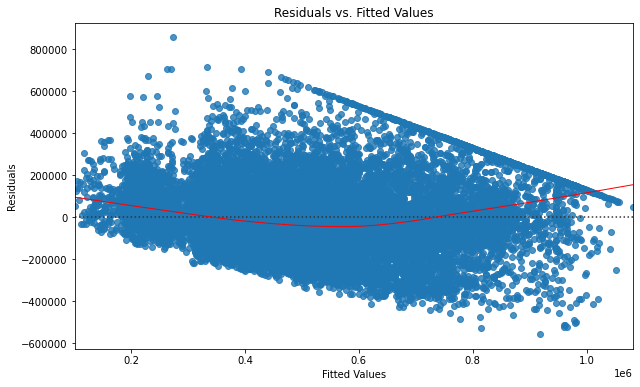

In [24]:
# Residuals vs. Fitted values plot
fitted_values = model4.predict(X6_train)
residuals = y6_train - fitted_values

plt.figure(figsize=(10, 6))
sns.residplot(fitted_values, residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The plot shows a curved pattern, indicating that the residuals are not randomly scattered around the horizontal axis. This suggests that the relationship between the predictors and the dependent variable may not be perfectly linear.

Consider applying transformations to the predictors or the dependent variable (e.g., log transformation) to achieve linearity.

### Normality: Plot: Q-Q plot and histogram of residuals.

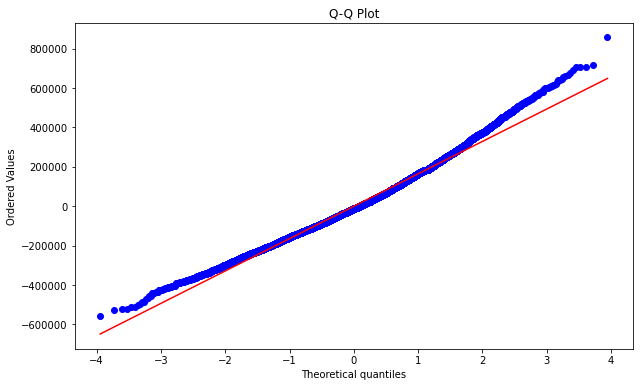

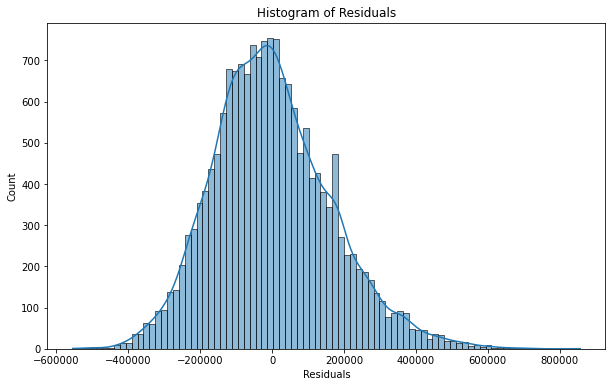

In [25]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


The Histogram of Residuals and Q-Q Plot indicate that the residuals are approximately normally distributed but with some deviations:

* Approximately Normal: The overall shape of the residuals suggests approximate normality, which supports the normality assumption to some extent.
* Deviations in Tails: The deviations at the tails, observed in both the histogram and Q-Q plot, suggest the presence of outliers and some skewness.
* Minor Skewness: The histogram shows a slight skewness to the right, which is also reflected in the Q-Q plot's tail deviations

Consider applying transformations (e.g., log transformation) to the dependent variable to achieve better normality. Also consider dropping outliers that may be affecting the normality of the residuals.

### Homoscedasticity: Plot Scale-Location (Spread-Location) plot.

c:\Users\engig\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


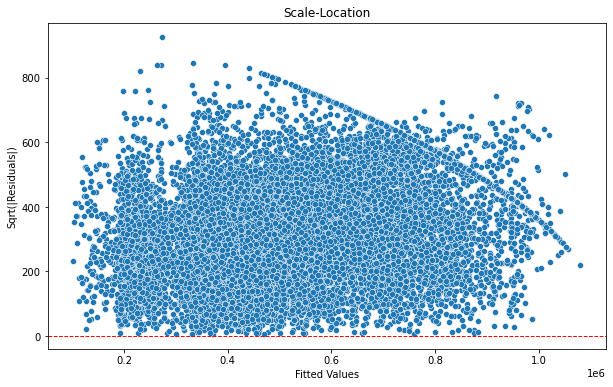

In [26]:
# Scale-Location plot
plt.figure(figsize=(10, 6))
sns.scatterplot(fitted_values, np.sqrt(np.abs(residuals)))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location')
plt.show()

The plot shows a decreasing spread of residuals as the fitted values increase, which indicates heteroscedasticity. The residuals are more spread out at lower fitted values and become more tightly clustered at higher fitted values.To address the issue of heteroscedasticity and improve the model, consider transformations to the dependent variable (e.g., log transformation) to stabilize the variance of the residuals.